# Notebook

## 1. Load Packages

In [1]:
from sklearn.metrics.pairwise import cosine_similarity
from bertopic import BERTopic
import pandas as pd
import numpy as np

## 2. Settings / Setup

In [2]:
model_A_path = "results_political_party_accounts/model"
model_B_path = "results_mentions/model"

In [3]:
model_A = BERTopic.load(model_A_path)
model_B = BERTopic.load(model_B_path)
model_A_name = "Political Party Accounts (Text)"
model_B_name = "Political Party Accounts (Text)"

## 3. Code

We can calculate the similarity between topics of a topic model `model_A` and another topic model `model_B`. To do so, we can simply calculate the cosine similarity between the topic_embedding of both models:

In [4]:
model_A_embeddings = model_A.topic_embeddings_[1:]
model_B_embeddings = model_B.topic_embeddings_[1:]
sim_matrix = cosine_similarity(model_A_embeddings, model_B_embeddings)

In [5]:
import pandas as pd

data_similarity = []
for topic_of_interest in range(0, len(model_A_embeddings)):
    model_A_tokens = model_A.get_topic(topic_of_interest)
    most_similar_topic = np.argmax(sim_matrix[topic_of_interest])
    model_B_tokens = model_B.get_topic(most_similar_topic)[:20]
    
    row = {
        'Topic A': topic_of_interest + 1,
        'Topic A Tokens': ', '.join([token[0] for token in model_A_tokens[:3]]),
        'Topic B': most_similar_topic + 1,
        'Topic B Tokens': ', '.join([token[0] for token in model_B_tokens[:3]]),
        'Similarity': round(sim_matrix[topic_of_interest][most_similar_topic], 3)
    }
    data_similarity.append(row)

df_similarity = pd.DataFrame(data_similarity)
df_similarity

,Topic A,Topic A Tokens,Topic B,Topic B Tokens,Similarity
0,1,"corona, covid, kinder",4,"impfung, impfstoff, virus",0.952
1,2,"berlin, brandner, bundestag",2,"deutschland, bayern, deutschen",0.976
2,3,"klimaschutz, klima, beim",5,"klimaschutz, klima, auto",0.985
3,4,"euro, scholz, rente",6,"geld, steuern, rente",0.976
4,5,"antwort, glückwunsch, herzlichen",1,"kinder, einfach, gut",0.974
5,6,"afghanistan, bundeswehr, taliban",9,"israel, afghanistan, russland",0.927
6,7,"eu, belarus, türkei",2,"deutschland, bayern, deutschen",0.935
7,8,"youtube, live, digitalen",11,"bild, medien, video",0.948
8,9,"antisemitismus, israel, rassismus",9,"israel, afghanistan, russland",0.938
9,10,"frauen, sprache, gender",14,"frauen, frau, männer",0.980


In [6]:
latex_table = df_similarity.to_latex(index=False)
print(latex_table)

\begin{tabular}{rlrlr}
\toprule
 Topic A &                           Topic A Tokens &  Topic B &                 Topic B Tokens &  Similarity \\
\midrule
       1 &                    corona, covid, kinder &        4 &      impfung, impfstoff, virus &       0.952 \\
       2 &              berlin, brandner, bundestag &        2 & deutschland, bayern, deutschen &       0.976 \\
       3 &                 klimaschutz, klima, beim &        5 &       klimaschutz, klima, auto &       0.985 \\
       4 &                      euro, scholz, rente &        6 &           geld, steuern, rente &       0.976 \\
       5 &         antwort, glückwunsch, herzlichen &        1 &           kinder, einfach, gut &       0.974 \\
       6 &         afghanistan, bundeswehr, taliban &        9 &  israel, afghanistan, russland &       0.927 \\
       7 &                      eu, belarus, türkei &        2 & deutschland, bayern, deutschen &       0.935 \\
       8 &                 youtube, live, digitalen &  

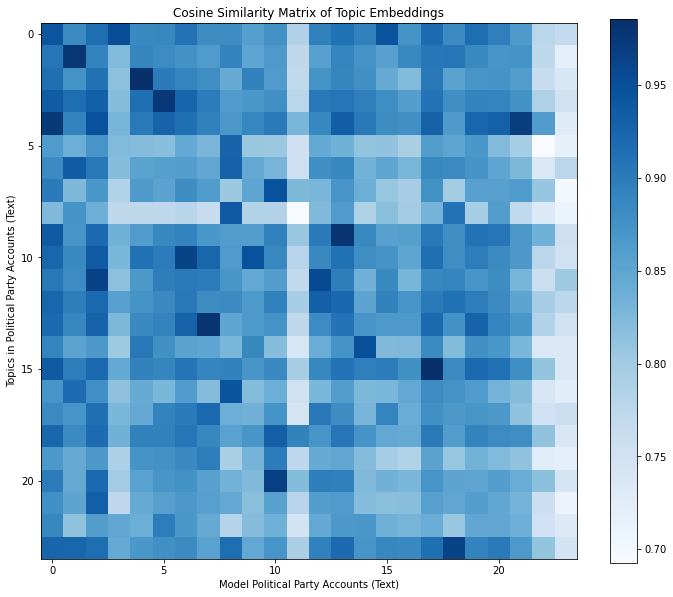

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12, 10)) 
plt.imshow(sim_matrix, cmap='Blues', interpolation='nearest')

highest_similarities = np.argmax(sim_matrix, axis=1)

#for topic_of_interest, most_similar_topic in enumerate(highest_similarities):
    #plt.gca().add_patch(plt.Rectangle((most_similar_topic - 0.5, topic_of_interest - 0.5), 1, 1, edgecolor='red', facecolor='none'))

plt.colorbar()
plt.title('Cosine Similarity Matrix of Topic Embeddings')
plt.xlabel(f'Model {model_A_name}')
plt.ylabel(f'Topics in {model_B_name}')
plt.show()


In [ ]:
# Topic Tabellen um text_political_accounts mit text_mentions zu vergleichen
# Topic Tabellen um img_political_accounts mit img_mentions zu vergleichen